In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [12]:
print("There are 1797 digits with label.")
print("Each number is 8x8 px with plt.cm.grey,"
      "represented by a np.array with shape (64,).",
      "row followed by row.", sep="\n")
print(digits.data.shape)
print(digits.target.shape)

There are 1797 digits with label.
Each number is 8x8 px with plt.cm.grey,
represented by a np.array with shape (64,).
row followed by row.
(1797, 64)
(1797,)


In [22]:
import numpy as np
import matplotlib.pyplot as plt

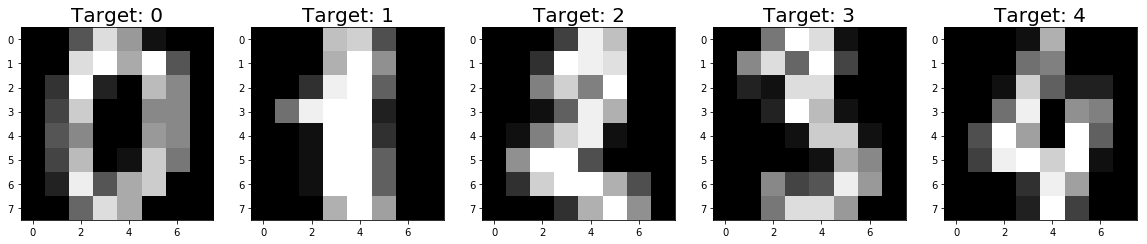

In [63]:
# A peek into the digits dataset.
plt.figure(figsize=(20,4))
for idx, (img, target) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(np.reshape(img, (8, 8)), cmap = plt.cm.gray)
    plt.title(f"Target: {target}", fontsize=20)
    

In [27]:
# Divide data into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, 
                                                    test_size=0.25, random_state=42)

In [32]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
# In sklearn, all machine learning models are implemented as python classes
logiRegr = LogisticRegression(max_iter=200) # Instantialize, with default parameters, by default, L-2 penalty and one-verse-rest was used
logiRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
predictions = logiRegr.predict(x_test)
print(f"Prediction accuracy: {np.mean(predictions == y_test)}")
# Equivalent to .score() function
# print(logiRegr.score(x_test, y_test))

Prediction accuracy: 0.9666666666666667
0.9666666666666667


In [92]:
# Let's see what are those mis-classified digits look like
mistakes = y_test != predictions
truths = y_test[mistakes]

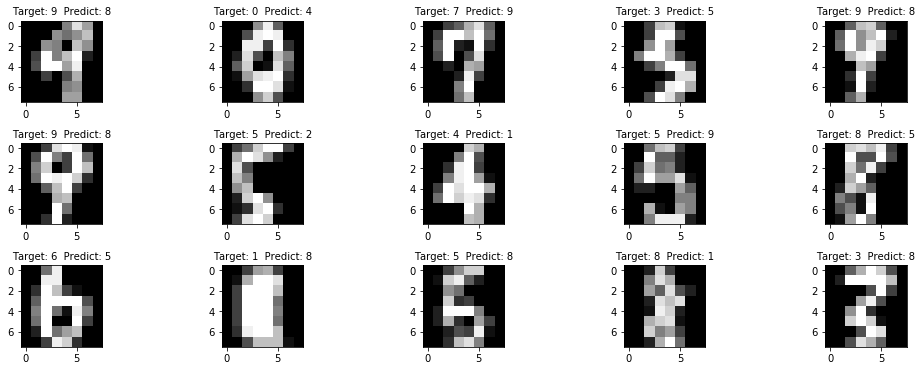

In [111]:
plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.5, right=0.8)
for idx, (img, pred) in enumerate(zip(x_test[mistakes], predictions[mistakes])):
    plt.subplot(3, 5, idx + 1)
    plt.imshow(img.reshape(8, 8), cmap = plt.cm.gray)
    plt.title(f"Target: {truths[idx]}  Predict: {pred}", fontsize=10)

In [119]:
# Confusion Matrix
# A confusion matrix is a way to visualize the multi-class classification model predictions
from sklearn import metrics
cm = metrics.confusion_matrix(predictions, y_test)
print(cm)
print()
print("Interpreting Confusion Matrix:","C_ij is the label i that is predicted as label j", sep="\n")

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  1  0  0  0  1  0]
 [ 0  0 38  0  0  1  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  0]
 [ 1  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  1  0 56  1  0  1  0]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  1  0  1  0  0 36  3]
 [ 0  0  0  0  0  1  0  1  0 45]]

Interpreting Confusion Matrix:
C_ij is the label i that is predicted as label j
